# Read & Understand JSON File + Data

### Understand JSON file

In [2]:
# import packages
import os
import json
import pandas as pd

# define function to summarize json file
def summarize_json(json_file_name):
    # Get the current directory path
    current_dir = os.getcwd()

    # Construct the full file path using the current directory and the JSON file name
    json_file_path = os.path.join(current_dir, json_file_name)

    # Read the JSON data from the file
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    # Create an empty list to store the summary data
    summary_data = []

    # Process each element in the JSON data
    for element_key, element_values in data.items():
        # Flatten the nested values and concatenate them into a single string
        values_str = ', '.join(f"{k}: {v}" for k, v in element_values.items())

        # Append the summary for this element to the list
        summary_data.append([element_key, values_str])

    # Convert the list of lists into a DataFrame
    summary_df = pd.DataFrame(summary_data, columns=['Element', 'Values'])

    # Set pandas option to display the maximum column width
    pd.set_option('display.max_colwidth', None)

    return summary_df

# Replace 'data.json' with the name of your JSON file located in the same directory as your script or notebook.
json_file_name = '2015_codes.json'

# Call the function to get the summary DataFrame
summary_data = summarize_json(json_file_name)

# Display the summary DataFrame
print(summary_data)

                                                   Element  \
0                                          resident_status   
1                                  education_1989_revision   
2                                  education_2003_revision   
3                                 education_reporting_flag   
4                                           month_of_death   
5                                                      sex   
6                                    age_substitution_flag   
7                                            age_recode_52   
8                                            age_recode_27   
9                                            age_recode_12   
10                                    infant_age_recode_22   
11                     place_of_death_and_decedents_status   
12                                          marital_status   
13                                    day_of_week_of_death   
14                                       current_data_year   
15      

### Understand data set

In [3]:
#import package
import pandas as pd

# read data
data = pd.read_csv('2015_data.csv')

# identify shape of data
print('Number of columns = %d' % (data.shape[0])) # number of columns
print('Number of attributes = %d' % (data.shape[1])) # number of rows
data.head()

C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/459422.py:5: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2015_data.csv')


Number of columns = 2718198
Number of attributes = 77


,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,NaN,3.0,1,1,M,1,84,NaN,42,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1,70,NaN,40,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,3.0,1,1,F,1,91,NaN,44,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,3.0,1,1,F,1,40,NaN,34,...,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,F,1,89,NaN,43,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


In [4]:
# get summary of all columns in data set
def column_summary(data, num_values=5):
    summary = "Column Summary:\n\n"
    for col in data.columns:
        summary += f"Column Name: {col}\n"
        summary += f"Data Type: {data[col].dtype}\n"
        summary += f"Sample Values: {data[col].head(num_values).tolist()}\n"
        summary += "\n"

    return summary

# Assuming "data" is your pandas DataFrame, call the function to get the summary.
summary_data = column_summary(data)

# Display the summary
print(summary_data)

Column Summary:

Column Name: resident_status
Data Type: int64
Sample Values: [1, 1, 1, 1, 1]

Column Name: education_1989_revision
Data Type: float64
Sample Values: [nan, nan, nan, nan, nan]

Column Name: education_2003_revision
Data Type: float64
Sample Values: [3.0, 6.0, 3.0, 3.0, 5.0]

Column Name: education_reporting_flag
Data Type: int64
Sample Values: [1, 1, 1, 1, 1]

Column Name: month_of_death
Data Type: int64
Sample Values: [1, 1, 1, 1, 1]

Column Name: sex
Data Type: object
Sample Values: ['M', 'M', 'F', 'F', 'F']

Column Name: detail_age_type
Data Type: int64
Sample Values: [1, 1, 1, 1, 1]

Column Name: detail_age
Data Type: int64
Sample Values: [84, 70, 91, 40, 89]

Column Name: age_substitution_flag
Data Type: float64
Sample Values: [nan, nan, nan, nan, nan]

Column Name: age_recode_52
Data Type: int64
Sample Values: [42, 40, 44, 34, 43]

Column Name: age_recode_27
Data Type: int64
Sample Values: [22, 20, 24, 14, 23]

Column Name: age_recode_12
Data Type: int64
Sample Val

In [5]:
# missing values by column
summary_data = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': (data.isnull().sum() / data.shape[0]) * 100
})

# Sort the summary DataFrame in descending order
summary_data = summary_data.sort_values(by='Missing Count', ascending=False)

# Set pandas option to display the maximum number of rows
pd.set_option('display.max_rows', None)

# Display the summary DataFrame
print(summary_data)

                                                        Missing Count  \
record_condition_16                                           2718198   
entity_condition_20                                           2718198   
entity_condition_19                                           2718198   
entity_condition_18                                           2718198   
entity_condition_17                                           2718198   
entity_condition_16                                           2718198   
record_condition_20                                           2718198   
record_condition_19                                           2718198   
record_condition_18                                           2718198   
record_condition_17                                           2718198   
entity_condition_15                                           2718195   
record_condition_15                                           2718192   
age_substitution_flag                              

In [6]:
# mmissing values for entire data set
total_missing_count = data.isnull().sum().sum()
total_cells = data.size
overall_missing_percentage = (total_missing_count / total_cells) * 100

print(f"Overall Missing Percentage: {overall_missing_percentage:.2f}%")

Overall Missing Percentage: 54.43%


In [7]:
# duplicate data
dups = data.duplicated() # returns duplicated rows
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 7908


In [30]:
# drop dups
# data = data.drop_duplicates() # drop duplicate rows
# print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 2718198
Number of rows after discarding duplicates = 1413205


In [32]:
# # sample 25% of the data
# sample = data.sample(frac=0.25, random_state=1)
# print('Number of rows after random sampling = %d' % (data.shape[0]))

Number of rows after random sampling = 1413205


# EDA Steps Below are Based on Diagram

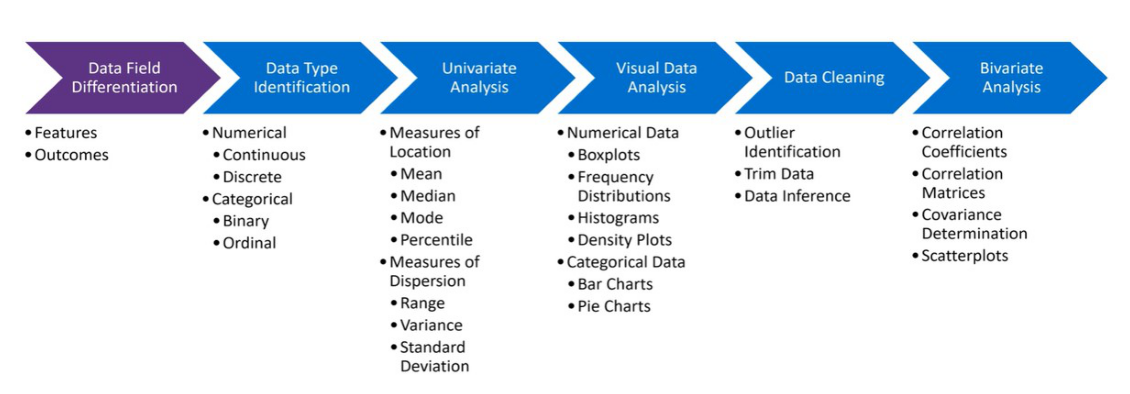

In [4]:
# import packate
from PIL import Image
import matplotlib.pyplot as plt

# import iamge
image_path = 'EDA_process.jpg'

# Open the JPEG image
image = Image.open(image_path)

# show the image using matplotlib
plt.figure(figsize=(20, 10)) 
plt.imshow(image)
plt.axis('off')  # Remove axes and ticks
plt.show()

# Step 1. Data Field Differentiation

In [ ]:
# define features and outcome variables

# outcome: manner_of_death
# features: TBD

# Step 2. Data Type Identification

In [8]:
# identify variable types
def column_type_summary(data, num_values=2):
    summary = pd.DataFrame(columns=['Column Name', 'Type', 'Sub-Class'])

    for col in data.columns:
        sample_values = data[col].head(num_values)

        if pd.api.types.is_numeric_dtype(sample_values):
            col_type = 'Numerical'
            # Check if it's continuous or discrete
            if len(sample_values.unique()) > num_values / 2:  # Arbitrary threshold to determine continuous
                sub_class = 'Continuous'
            else:
                sub_class = 'Discrete'
        else:
            col_type = 'Categorical'
            # Check if it's binary or ordinal
            unique_values = sample_values.dropna().unique()
            if len(unique_values) == 2:
                sub_class = 'Binary'
            else:
                sub_class = 'Ordinal'

        summary = summary.append({'Column Name': col, 'Type': col_type, 'Sub-Class': sub_class}, ignore_index=True)

    return summary

# call the function to get the summary of data set
summary_data = column_type_summary(data)

# sroup the DataFrame based on the 'Type' column and aggregate the 'Sub-Class' column as a list
grouped_summary = summary_data.groupby('Type')['Sub-Class'].apply(list).reset_index()

# display summary DataFrame with "Sub-Class" column and "Type" column
print(summary_data[['Column Name', 'Type', 'Sub-Class']])

C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'Column Name': col, 'Type': col_type, 'Sub-Class': sub_class}, ignore_index=True)
C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'Column Name': col, 'Type': col_type, 'Sub-Class': sub_class}, ignore_index=True)
C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'Column Name': col, 'Type': col_type, 'Sub-Class': sub_class}, ignore_index=True)
C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24:

                                               Column Name         Type  \
0                                          resident_status    Numerical   
1                                  education_1989_revision    Numerical   
2                                  education_2003_revision    Numerical   
3                                 education_reporting_flag    Numerical   
4                                           month_of_death    Numerical   
5                                                      sex  Categorical   
6                                          detail_age_type    Numerical   
7                                               detail_age    Numerical   
8                                    age_substitution_flag    Numerical   
9                                            age_recode_52    Numerical   
10                                           age_recode_27    Numerical   
11                                           age_recode_12    Numerical   
12                       

C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'Column Name': col, 'Type': col_type, 'Sub-Class': sub_class}, ignore_index=True)
C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'Column Name': col, 'Type': col_type, 'Sub-Class': sub_class}, ignore_index=True)
C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'Column Name': col, 'Type': col_type, 'Sub-Class': sub_class}, ignore_index=True)
C:\Users\marvi\AppData\Local\Temp/ipykernel_57468/1800179452.py:24:

# Step 3. Univariate Analysis

## Measures of Location (Numerical)

In [9]:
# indentify numerical variables
columns_to_select = ['resident_status','education_1989_revision','education_2003_revision','education_reporting_flag','month_of_death','detail_age_type','detail_age','age_substitution_flag','age_recode_52','age_recode_27','age_recode_12','infant_age_recode_22','place_of_death_and_decedents_status','day_of_week_of_death','current_data_year','manner_of_death','activity_code','place_of_injury_for_causes_w00_y34_except_y06_and_y07_','358_cause_recode','113_cause_recode','130_infant_cause_recode','39_cause_recode','number_of_entity_axis_conditions','entity_condition_16','entity_condition_17','entity_condition_18','entity_condition_19','entity_condition_20','number_of_record_axis_conditions','record_condition_16','record_condition_17','record_condition_18','record_condition_19','record_condition_20','race','bridged_race_flag','race_imputation_flag','race_recode_3','race_recode_5','hispanic_origin','hispanic_originrace_recode']

# Create new data frame with the selected columns
num_cols = data[columns_to_select].copy()

In [10]:
# generate statistical summary for numerical variables
num_cols.describe(include='all')

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
count,2.718198e+06,73043.000000,2.645155e+06,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06,13.0,2.718198e+06,2.718198e+06,...,0.0,0.0,0.0,2.718198e+06,12288.0,26149.000000,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06
mean,1.226700e+00,12.602371,3.718700e+00,9.731282e-01,6.381973e+00,1.025770e+00,7.345519e+01,1.0,4.008087e+01,2.019971e+01,...,NaN,NaN,NaN,1.696986e+00,1.0,1.753375,1.267771e+00,1.206286e+00,1.126411e+02,5.930529e+00
std,4.993832e-01,9.516661,1.985368e+00,1.617089e-01,3.520758e+00,3.105674e-01,2.230170e+01,0.0,4.621407e+00,3.850541e+00,...,NaN,NaN,NaN,5.282618e+00,0.0,0.431055,6.573266e-01,5.712140e-01,6.726954e+01,1.197932e+00
min,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00
25%,1.000000e+00,11.000000,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,6.300000e+01,1.0,3.800000e+01,1.800000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
50%,1.000000e+00,12.000000,3.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,7.700000e+01,1.0,4.100000e+01,2.100000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
75%,1.000000e+00,13.000000,5.000000e+00,1.000000e+00,9.000000e+00,1.000000e+00,8.700000e+01,1.0,4.300000e+01,2.300000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
max,4.000000e+00,99.000000,9.000000e+00,1.000000e+00,1.200000e+01,9.000000e+00,9.990000e+02,1.0,5.200000e+01,2.700000e+01,...,NaN,NaN,NaN,7.800000e+01,1.0,2.000000,3.000000e+00,4.000000e+00,9.980000e+02,9.000000e+00


## Measures of Dispersion (Numerical)

In [11]:
# Calculate the range for each numerical column
range_summary = num_cols.max() - num_cols.min()

# Calculate the variance for each numerical column
variance_summary = num_cols.var()

# Calculate the standard deviation for each numerical column
std_deviation_summary = num_cols.std()

# Calculate the 25th, 50th (median), and 75th percentiles for each numerical column
percentiles_summary = num_cols.quantile([0.25, 0.50, 0.75])

# Display the summary of measures of dispersion
print("Range Summary:")
print(range_summary)

print("\nVariance Summary:")
print(variance_summary)

print("\nStandard Deviation Summary:")
print(std_deviation_summary)

print("\nPercentiles Summary:")
print(percentiles_summary)

Range Summary:
resident_status                                             3.0
education_1989_revision                                    99.0
education_2003_revision                                     8.0
education_reporting_flag                                    1.0
month_of_death                                             11.0
detail_age_type                                             8.0
detail_age                                                998.0
age_substitution_flag                                       0.0
age_recode_52                                              51.0
age_recode_27                                              26.0
age_recode_12                                              11.0
infant_age_recode_22                                       21.0
place_of_death_and_decedents_status                         8.0
day_of_week_of_death                                        8.0
current_data_year                                           0.0
manner_of_death          

# Step 4. Visual Data Analysis

## Numerical Data

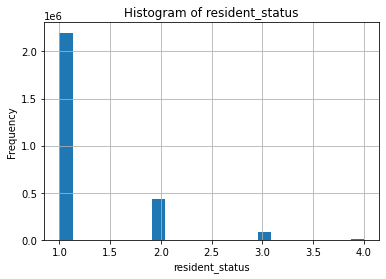

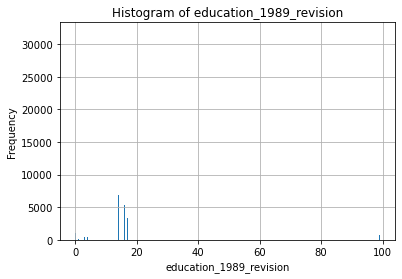

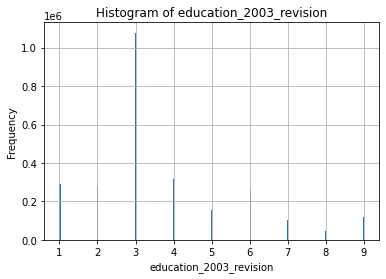

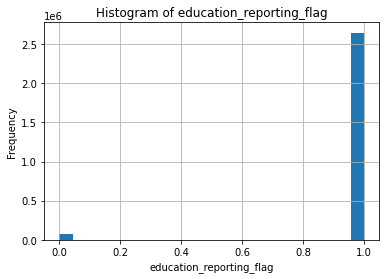

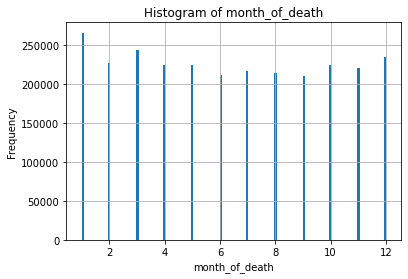

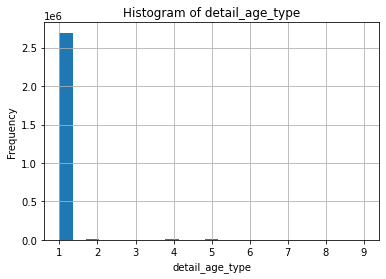

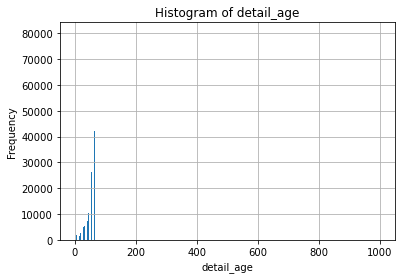

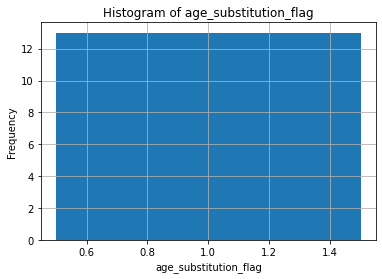

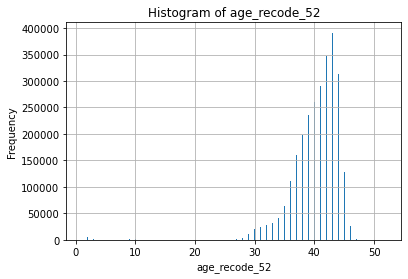

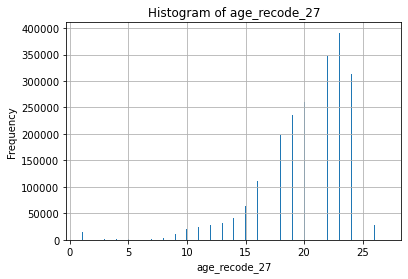

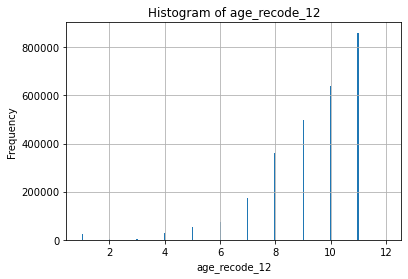

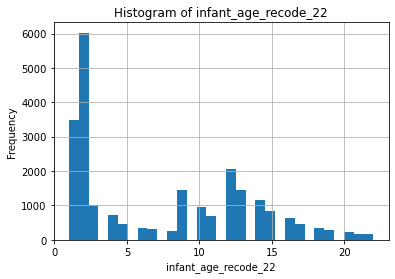

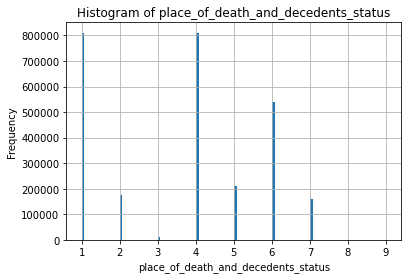

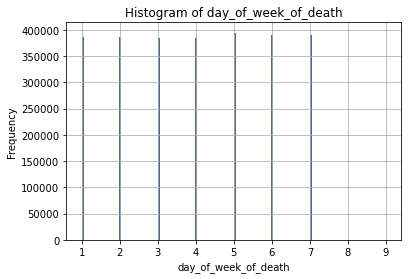

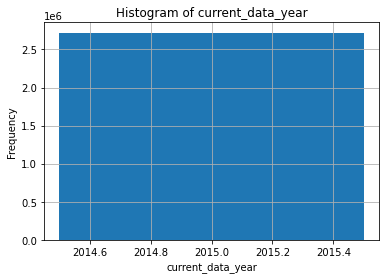

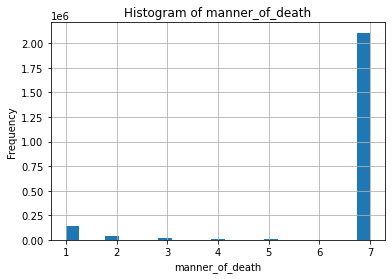

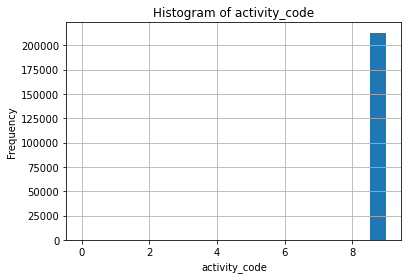

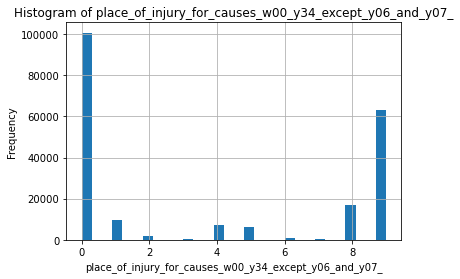

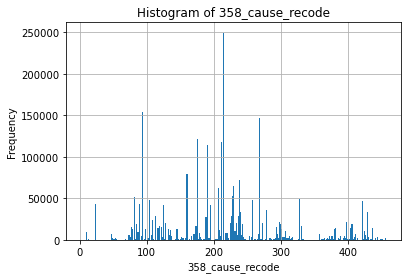

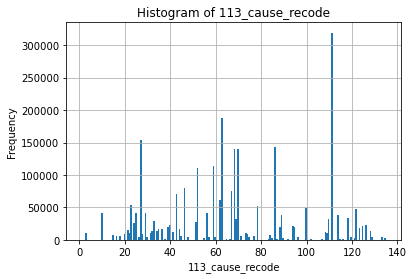

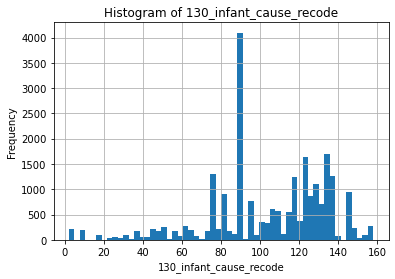

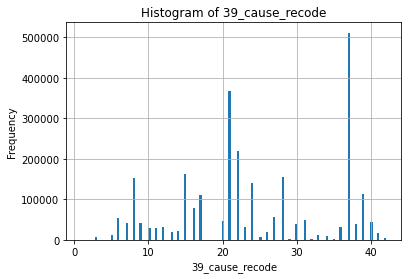

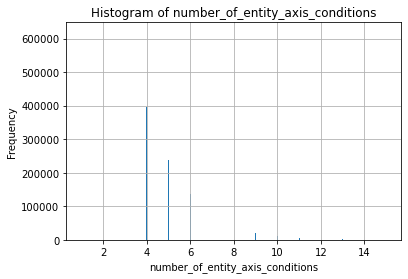

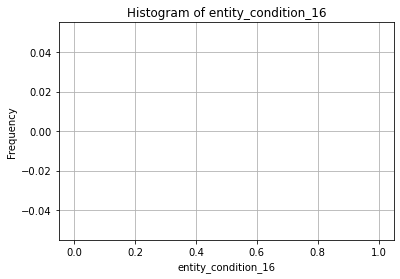

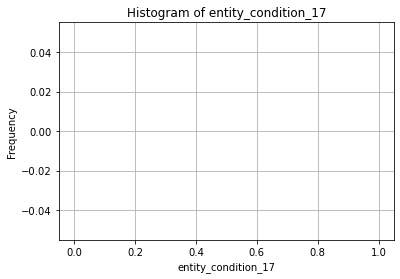

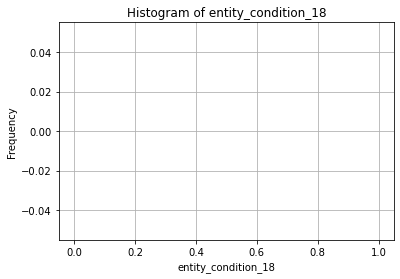

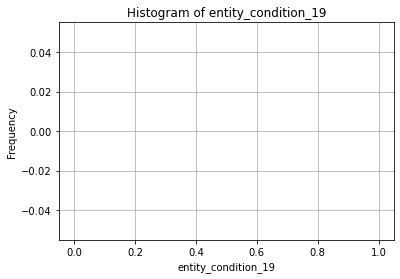

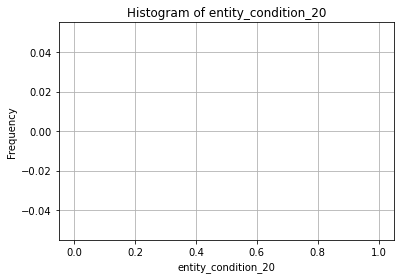

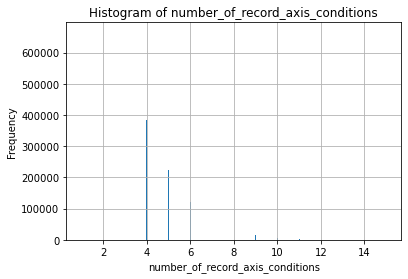

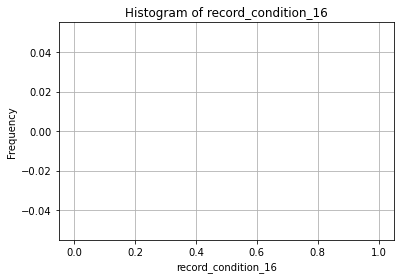

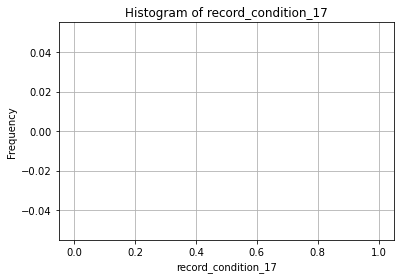

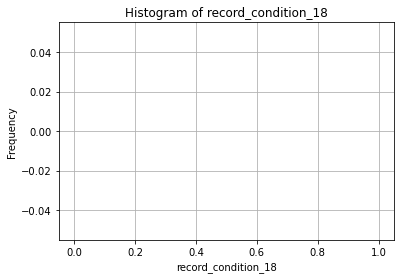

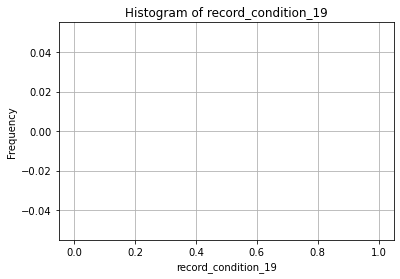

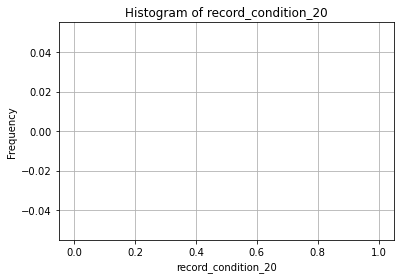

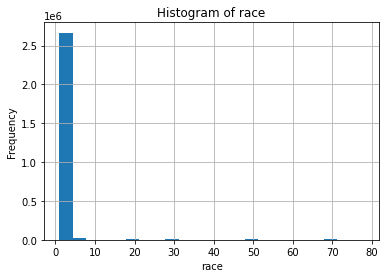

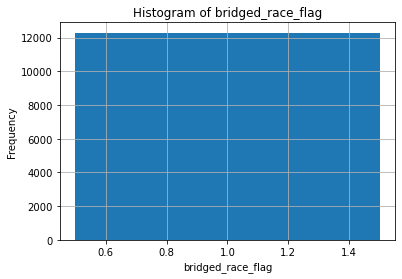

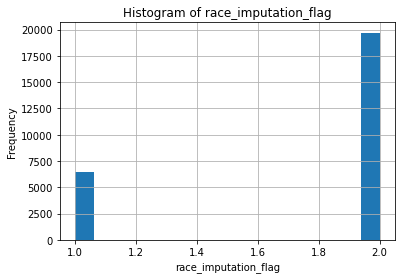

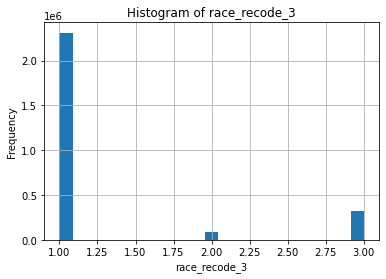

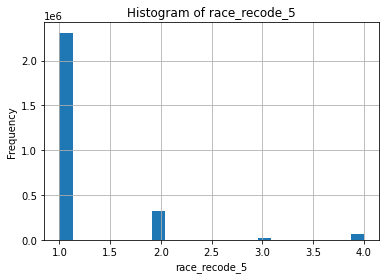

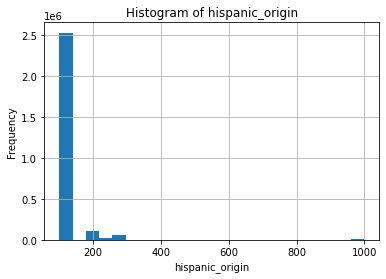

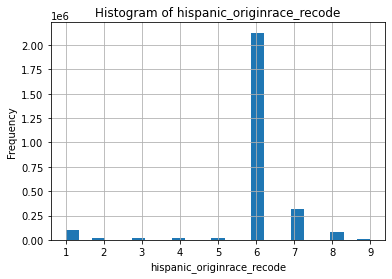

In [14]:
# import package
import matplotlib.pyplot as plt

# create histogram for all numerical variables
for column in num_cols.columns:
    plt.figure() 
    num_cols[column].hist(bins='auto')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Categorical Data

In [15]:
# indentify categorical variables
cat_columns_to_select = ['sex','marital_status','injury_at_work','method_of_disposition','autopsy','icd_code_10th_revision','entity_condition_1','entity_condition_2','entity_condition_3','entity_condition_4','entity_condition_5','entity_condition_6','entity_condition_7','entity_condition_8','entity_condition_9','entity_condition_10','entity_condition_11','entity_condition_12','entity_condition_13','entity_condition_14','entity_condition_15','record_condition_1','record_condition_2','record_condition_3','record_condition_4','record_condition_5','record_condition_6','record_condition_7','record_condition_8','record_condition_9','record_condition_10','record_condition_11','record_condition_12','record_condition_13','record_condition_14','record_condition_15']
# Create new data frame with the selected columns
cat_cols = data[cat_columns_to_select].copy()

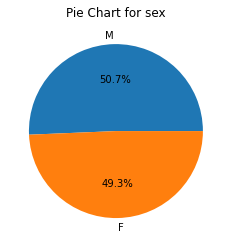

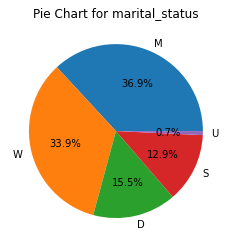

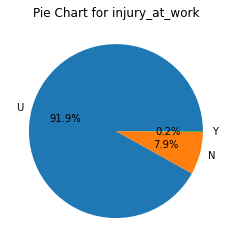

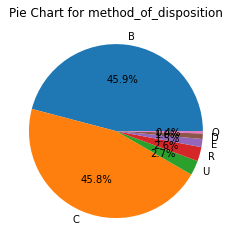

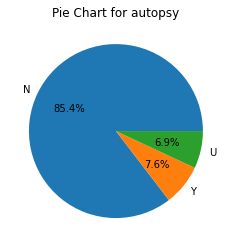

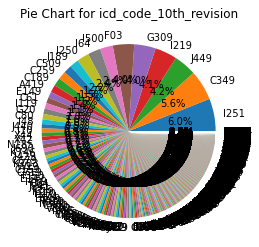

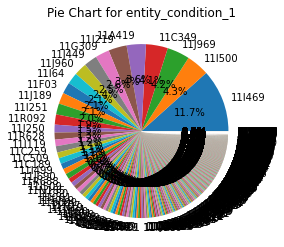

KeyboardInterrupt: 

In [16]:
# create pir charts for categorical variables
for column in cat_cols.columns:
    plt.figure()
    counts = cat_cols[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f"Pie Chart for {column}")
    plt.show()

# Step 5. Data Cleaning

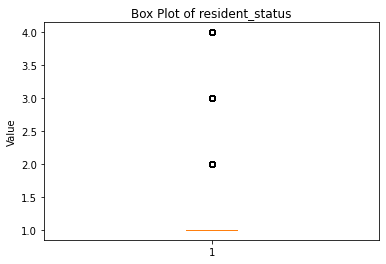

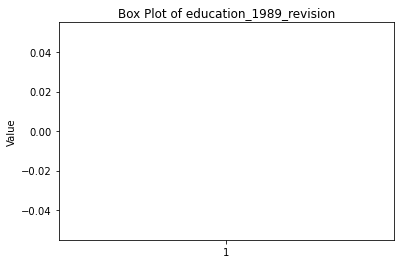

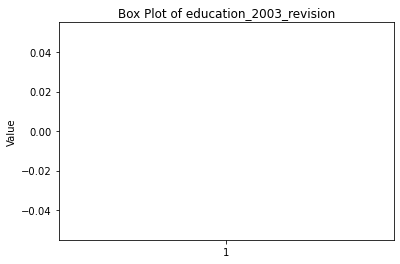

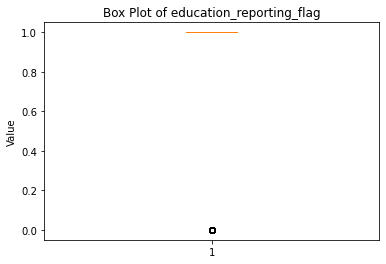

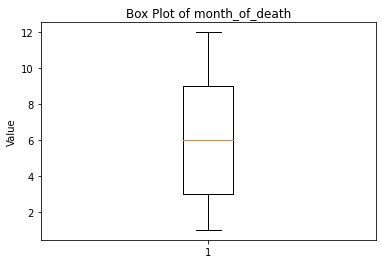

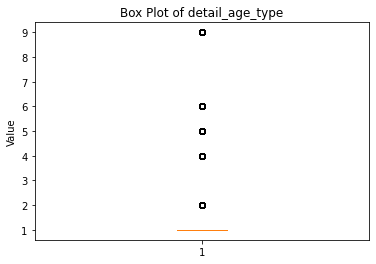

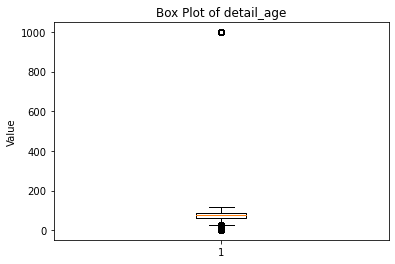

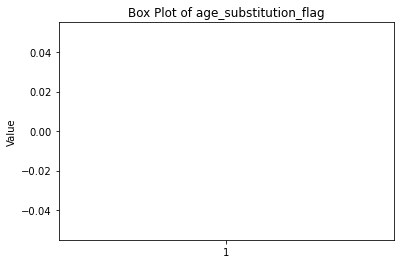

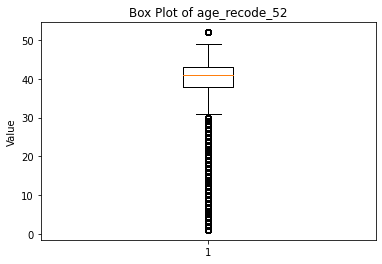

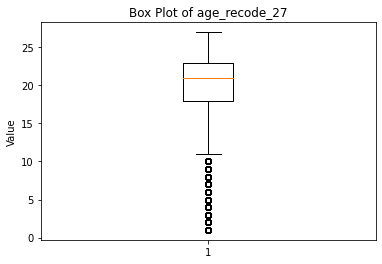

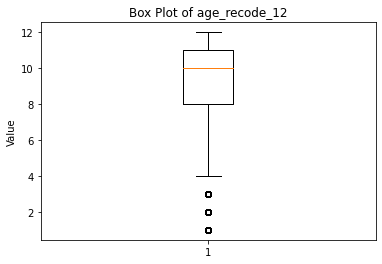

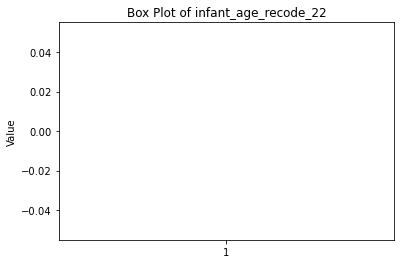

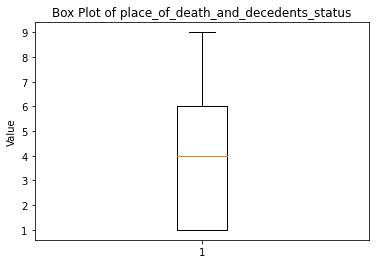

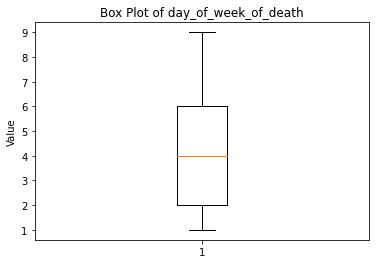

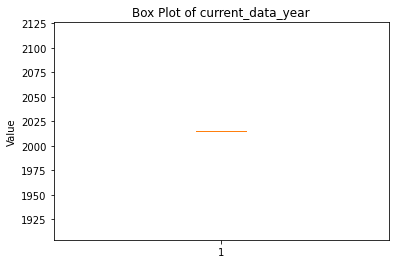

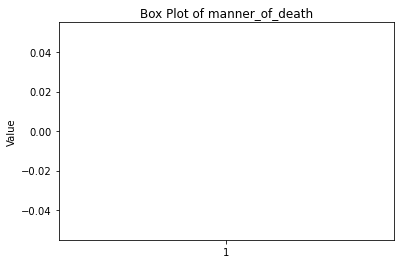

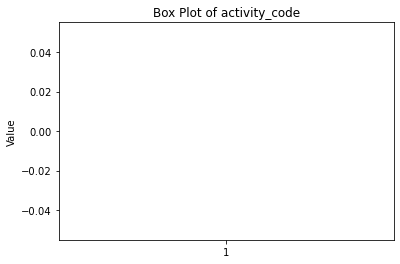

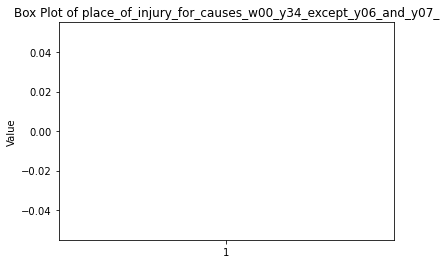

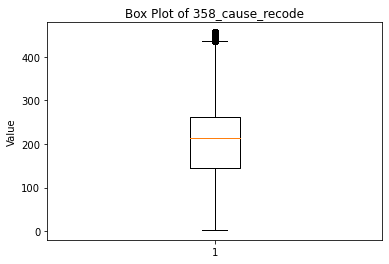

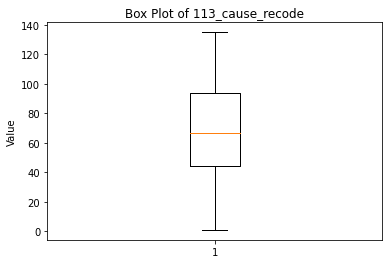

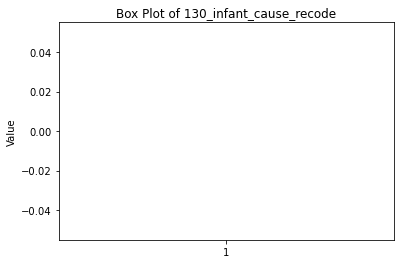

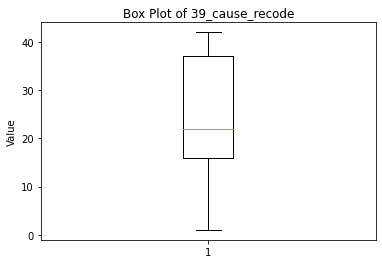

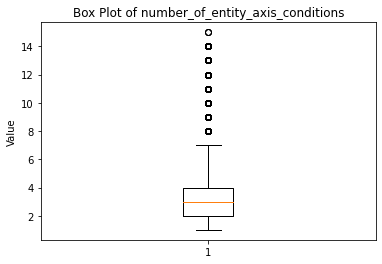

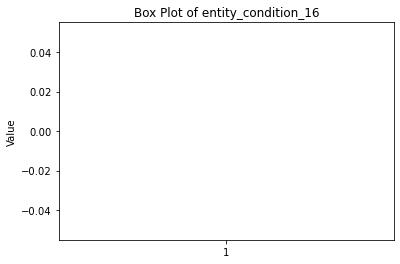

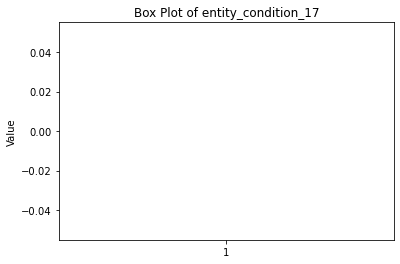

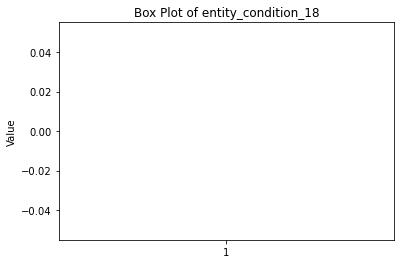

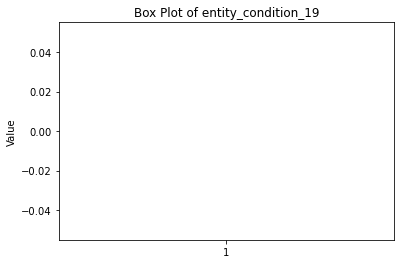

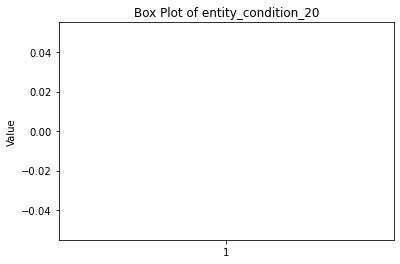

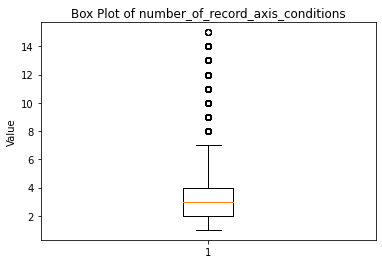

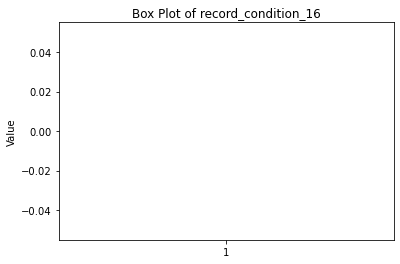

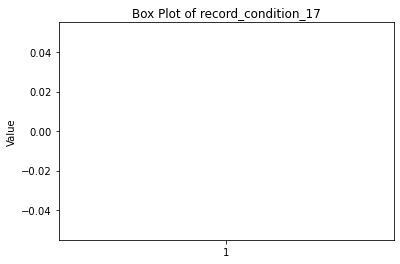

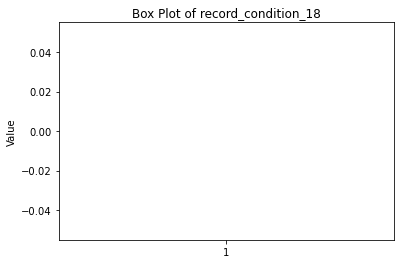

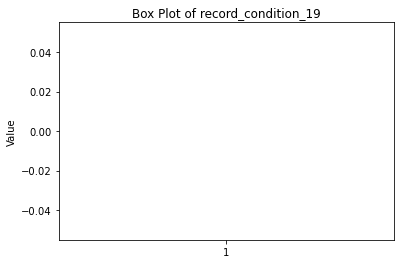

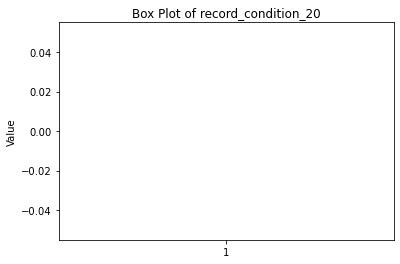

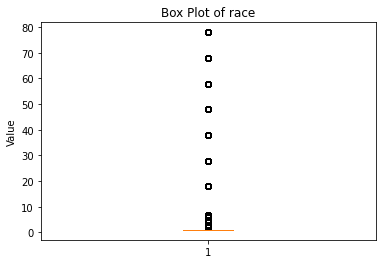

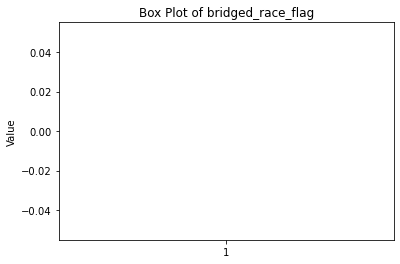

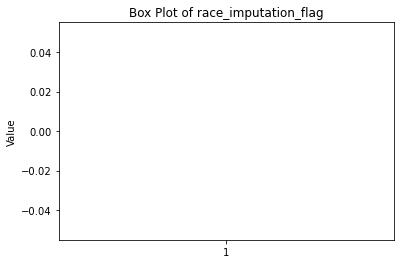

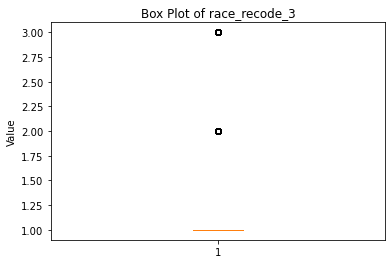

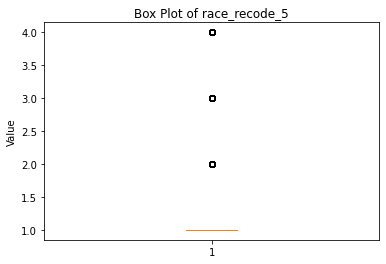

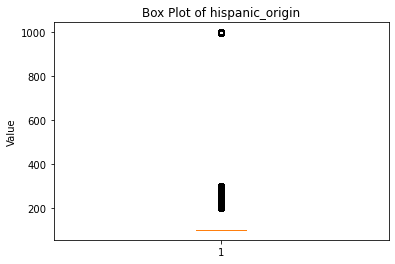

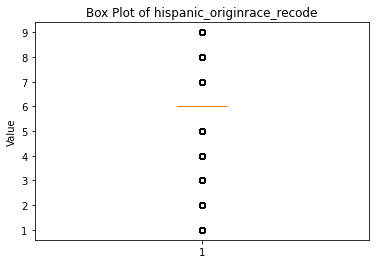

In [21]:
# Ccreate box plots for numerical variables to identify outliers
for column in num_cols.columns:
    plt.figure()  # Create a new figure for each box plot
    plt.boxplot(num_cols[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel("Value")
    plt.show()

In [ ]:
# use this section to trim data and make inferences (about the entire data set)

# Step 6. Bivariate Analysis

In [ ]:
# create scatter plot to provide intial grimpse of correlation
num_cols_columns = num_cols.columns
num_cols_count = len(num_cols_columns)

# Calculate the number of rows and columns required for subplots
num_rows = num_cols_count
num_cols_subplot = num_cols_count

# Create a new figure for the scatter plots
plt.figure(figsize=(10, 10))

# Iterate through each pair of numerical columns
for i in range(num_cols_count):
    for j in range(num_cols_count):
        # Determine the subplot position
        subplot_position = i * num_cols_subplot + j + 1

        # Create scatter plot for the current pair of columns
        plt.subplot(num_rows, num_cols_subplot, subplot_position)
        plt.scatter(num_cols[num_cols_columns[i]], num_cols[num_cols_columns[j]])
        plt.xlabel(num_cols_columns[i])
        plt.ylabel(num_cols_columns[j])
        plt.title(f"Scatter Plot of {num_cols_columns[i]} vs. {num_cols_columns[j]}")

# Adjust spacing between subplots to avoid overlap
plt.tight_layout()

# Display the scatter plots
plt.show()

In [27]:
# Generate a correlation matrix
correlation_matrix = num_cols.corr().abs() 
correlation_matrix = correlation_matrix.unstack().sort_values(ascending=False)
correlation_matrix = correlation_matrix[correlation_matrix != 1.0]

# Display the sorted correlation values
print("Correlation Matrix (sorted):")
print(correlation_matrix)

Correlation Matrix (sorted):
age_recode_27                                           age_recode_12                                             0.985768
age_recode_12                                           age_recode_27                                             0.985768
number_of_entity_axis_conditions                        number_of_record_axis_conditions                          0.974697
number_of_record_axis_conditions                        number_of_entity_axis_conditions                          0.974697
age_recode_52                                           age_recode_27                                             0.962421
age_recode_27                                           age_recode_52                                             0.962421
age_recode_12                                           age_recode_52                                             0.940243
age_recode_52                                           age_recode_12                                         